#    Comaring Rate of Returns of Famouse MKT Indices and a 10Years Old Portfolio Rate of Return including ^GDAXI, ^IXIC, ^GSPC, PG, and ^DJI 

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as webdata
import matplotlib.pyplot as plt

In [2]:
indices = ["^GDAXI","^IXIC","^GSPC", '^GSPC', 'PG', '^DJI']

indices_data = pd.DataFrame()

for t in indices:
    indices_data[t] = webdata.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [3]:
indices_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5295 entries, 2000-01-03 to 2020-11-12
Data columns (total 5 columns):
^GDAXI    5295 non-null float64
^IXIC     5159 non-null float64
^GSPC     5159 non-null float64
PG        5159 non-null float64
^DJI      5159 non-null float64
dtypes: float64(5)
memory usage: 248.2 KB


In [4]:
indices_data.tail()

,^GDAXI,^IXIC,^GSPC,PG,^DJI
Date,,,,,
2020-11-06,12480.019531,11895.230469,3509.439941,143.229996,28323.400391
2020-11-09,13095.969727,11713.780273,3550.500000,137.990005,29157.970703
2020-11-10,13163.110352,11553.860352,3545.530029,140.259995,29420.919922
2020-11-11,13216.179688,11786.429688,3572.659912,142.070007,29397.630859
2020-11-12,13149.379883,NaN,NaN,NaN,NaN


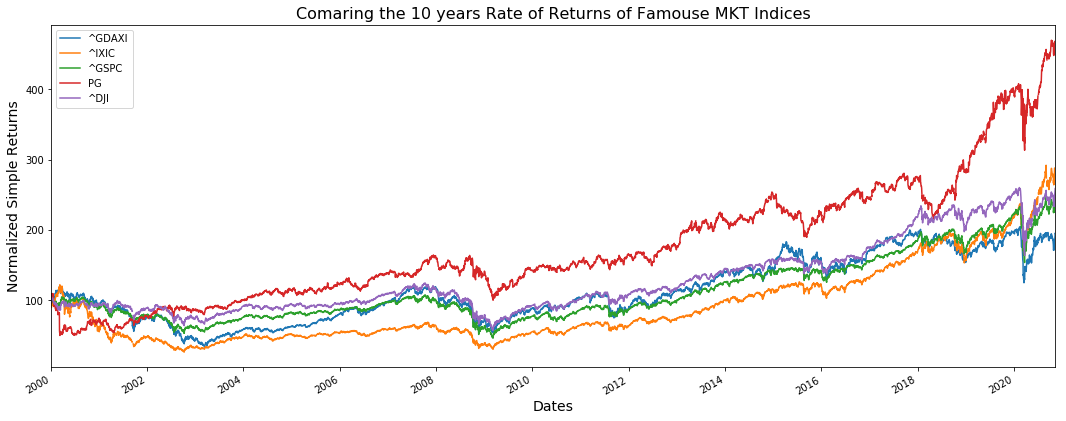

In [5]:
(indices_data / indices_data.iloc[0] * 100).plot(figsize=(18, 7));
with plt.style.context('Solarize_Light2'):
    plt.title('Comaring the 10 years Rate of Returns of Famouse MKT Indices')
    plt.xlabel('Dates', fontsize=14)
    plt.ylabel('Normalized Simple Returns', fontsize=14)
plt.show()

In [6]:
indices_returns = (indices_data / indices_data.shift(1)) - 1
indices_returns.tail()

,^GDAXI,^IXIC,^GSPC,PG,^DJI
Date,,,,,
2020-11-06,-0.007007,0.000362,-0.000288,0.005970,-0.002352
2020-11-09,0.049355,-0.015254,0.011700,-0.036584,0.029466
2020-11-10,0.005127,-0.013652,-0.001400,0.016450,0.009018
2020-11-11,0.004032,0.020129,0.007652,0.012905,-0.000792
2020-11-12,-0.005054,NaN,NaN,NaN,NaN


## annual returns

In [7]:
annual_indices_returns = indices_returns.mean() * 250
print(str(round(annual_indices_returns,3)*100))

^GDAXI    5.9
^IXIC     8.7
^GSPC     6.8
PG        9.4
^DJI      7.0
dtype: float64


## Equally Weighted MKT Portfolio Rate of Returns 

In [8]:
weights=np.array([0.20, 0.20, 0.20, 0.20, 0.20])

In [9]:
MKTPfolio=str(round(np.dot(annual_indices_returns,weights),4)*100)+'%'

In [10]:
print(MKTPfolio, 'is the return of a 10 years old Portfolio including ^GDAXI, ^IXIC, ^GSPC, PG, and ^DJI .')

7.57% is the return of a 10 years old Portfolio including ^GDAXI, ^IXIC, ^GSPC, PG, and ^DJI .
